# CLT with dice

You can view these sheets on github, but to modify them, you'll need to a version of jupyter. How to install it is explained here: http://jupyter.readthedocs.io/en/latest/install.html.
If you want to use the functions defined below to generate your own distributions, you need to compile them first. Easiest done by clicking (once have opened this as jupyter notebook): Kernel -> Restart & Run All. (Alternatively, you can use the >| button to click your way through, but you need to start from the beginning to have access to all functions defined on this sheet). Have fun!

Let's generate a few distributions and calculate the mean, mode, median for each.
Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let's generate a distribution we would get from throwing a (fair) die

In [2]:
def throwOneDie(HowOften):
    flatRandom = np.random.random(HowOften) # gives me a numpy array
    #turn it into integers from 1 to 6:
    return np.trunc(flatRandom*6)+1  #numpy way of saying: return [int(x*6)+1 for x in flatRandom]

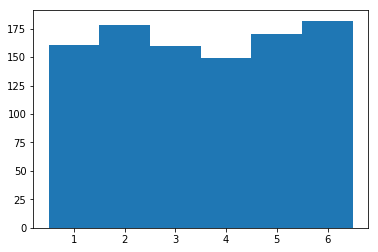

In [3]:
oneDieRandom = throwOneDie(1000)
h=plt.hist(oneDieRandom, 6, range=(0.5, 6.5)) # make histogram
plt.show()

Calulate arithmetic mean and std-dev

In [4]:
def meanAndStdev(sample):
    sum=0
    sumsq=0
    for x in sample:
        sum   += x
        sumsq += x**2
    N = len(sample)
    mean   = sum/N
    meansq = sumsq/N
    Variance = meansq - mean**2
    StandardDeviation = sqrt(Variance)
    return mean, Variance, StandardDeviation

In [5]:
mu, variance, sigma = meanAndStdev(oneDieRandom)
print("mean = ", mu, ", sigma = ", sigma)

mean =  3.535 , sigma =  1.732851695904759


Now let's throw multiple dice

In [6]:
def sumMultiRandom(PDF, NDice=10, Nevents=1000): 
    # we'll write it such that we can give it various PDFs, not just dice
    # For dice we'll pass throwOneDie as first argument
    randomNumbers=PDF(Nevents)
    if NDice == 1: return randomNumbers
    
    for counter in range(NDice-1):
        randomNumbers += PDF(Nevents)  
        ## above line is the numpy way of saying
        ## newRandomNumbers = PDF(Nevents)
        ## randomNumbers = [x + y for x, y in zip(randomNumbers, newRandomNumbers)]
    return randomNumbers

We'll also need to be able to draw a Gaussian, for comparison

In [7]:
def gauss(x, mean, sigma):
    Del = (x-mean)/sigma
    return 1.0/(np.sqrt(2*pi)*sigma)  *  np.exp(-0.5*Del*Del)

Now let's put it all together in one neat function

In [8]:
def doAll(PDF, NDice=1, Nevents=1000, histoBins=-1, histoMin=999, histoMax=-999, showGauss=0, average=0):

    RandomDice = sumMultiRandom(PDF, NDice=NDice, Nevents=Nevents)
    if average:
        RandomDice /= NDice  # RandomDice a numpy array so this means every element will be divided by NDice
    mini=histoMin
    maxi=histoMax

    if(histoMax < histoMin):
        mini=NDice -0.5
        maxi=NDice*6 + 0.5
        if average:
            mini /= NDice
            maxi /= NDice
        if mini > min(RandomDice) : mini = min(RandomDice) - 0.5
        if maxi < max(RandomDice) : maxi = max(RandomDice) + 0.5
    bins=int(maxi - mini)
    if average: bins=int((maxi-mini)*NDice)
        
    if histoBins > 0 : bins=histoBins
    
    h=plt.hist(RandomDice, bins, range=(mini, maxi)) # make histogram

    mu, var, sigma = meanAndStdev(RandomDice)
    
    if showGauss:
        oversampling=10
        dx = (maxi-mini)/bins
        xArray=np.arange(mini, maxi, dx/oversampling)
        plt.plot(xArray,gauss(xArray, mu, sigma)*dx*Nevents)

    plt.show()
    
    print("For ", NDice, " random numbers added ", Nevents, " times:")
    print("mean = ", mu, ", variance = ", var, ", sigma = ", sigma)

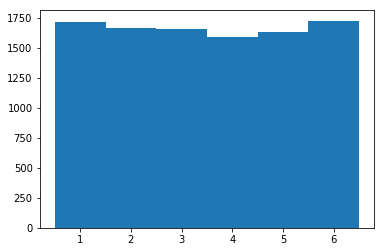

For  1  random numbers added  10000  times:
mean =  3.4941 , variance =  2.97976519 , sigma =  1.7261996379329942


In [9]:
doAll(throwOneDie, 1, 10000, showGauss=0)

Let's try it out for a few distributions and see if mean and variance are both proportional to the number of dice, as expected, and let's also compare it to a Gaussian

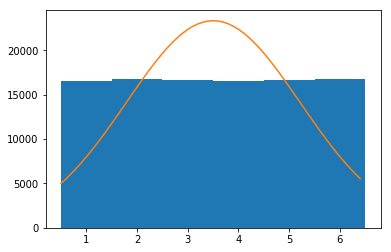

For  1  random numbers added  100000  times:
mean =  3.5026 , variance =  2.919913239999998 , sigma =  1.708775362650105


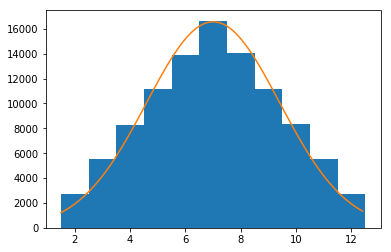

For  2  random numbers added  100000  times:
mean =  7.00122 , variance =  5.8004385115999995 , sigma =  2.4084099550533336


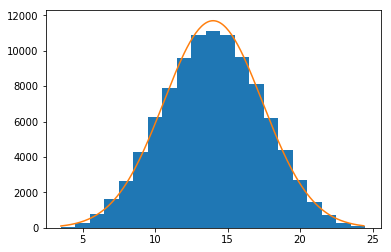

For  4  random numbers added  100000  times:
mean =  13.9986 , variance =  11.633898039999991 , sigma =  3.4108500465426492


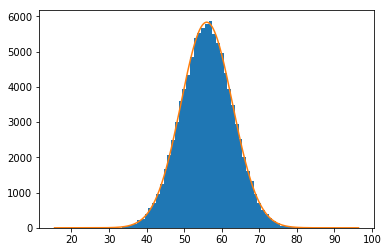

For  16  random numbers added  100000  times:
mean =  55.98916 , variance =  46.77356249440027 , sigma =  6.839120008773078


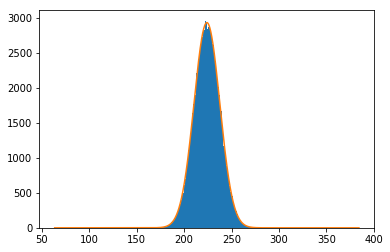

For  64  random numbers added  100000  times:
mean =  224.03574 , variance =  185.59118265239522 , sigma =  13.623185481097849


In [10]:
doAll(throwOneDie, 1, 100000, showGauss=1)
doAll(throwOneDie, 2, 100000, showGauss=1)
doAll(throwOneDie, 4, 100000, showGauss=1)
doAll(throwOneDie, 16, 100000, showGauss=1)
doAll(throwOneDie, 64, 100000, showGauss=1)

What happens if we average, instead of sum? According to the lectures, the mean should stay constant, but the variance should go down with NDice (and the standard deviation with \sqrt{NDICE}. Let's check:

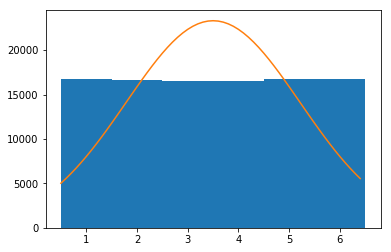

For  1  random numbers added  100000  times:
mean =  3.49964 , variance =  2.9294798704 , sigma =  1.7115723386407014


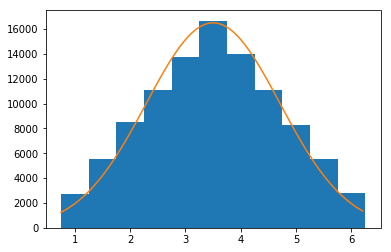

For  2  random numbers added  100000  times:
mean =  3.500415 , variance =  1.4610673277750017 , sigma =  1.208746180045671


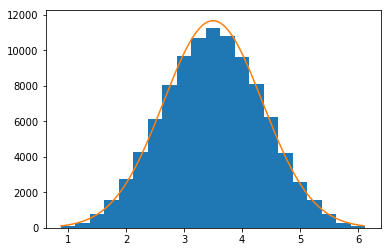

For  4  random numbers added  100000  times:
mean =  3.498 , variance =  0.7293147499999986 , sigma =  0.8539992681495685


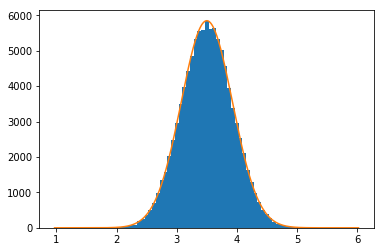

For  16  random numbers added  100000  times:
mean =  3.50143 , variance =  0.1819699082249997 , sigma =  0.4265793105918285


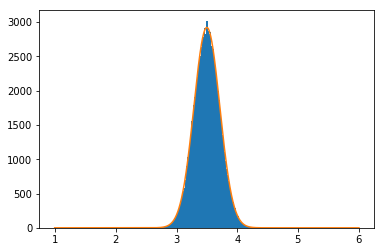

For  64  random numbers added  100000  times:
mean =  3.4997684375 , variance =  0.04548676766786919 , sigma =  0.21327627075666244


In [11]:
doAll(throwOneDie, 1, 100000, showGauss=1, average=1)
doAll(throwOneDie, 2, 100000, showGauss=1, average=1)
doAll(throwOneDie, 4, 100000, showGauss=1, average=1)
doAll(throwOneDie, 16, 100000, showGauss=1, average=1)
doAll(throwOneDie, 64, 100000, showGauss=1, average=1)

So... averaging clearly is good for you - the error goes down with 1/sqrt(N), where N is the number of experiments (here: throws of a die) that you average over.

Does it also work with other distributions? Let's try a triangular shaped one

In [12]:
def throwTriangle(HowOften):
    flat = np.random.random(HowOften)
    ## we'll use a coordinate transformation to make a triangular distribution
    triangleRandom = np.sqrt(flat)  # this is the numpy way of saying: triangleRandom = [sqrt(x) for x in flat]
    #turn it into integers from 1 to 6: (not really needed, but why not) and return
    return np.trunc(triangleRandom*6) + 1  # numpy version of:  return [int(x*6)+1 for x in triangleRandom]
# note that I am turing the random numbers into integers between 1 and 6 simply to keep the
# analogy to the dice. There is no other reason for this.
# For demonstrating the CLT. real numbers are just fine.
# - the the exponential example further down for an example with real numbers.


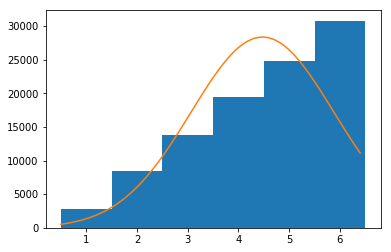

For  1  random numbers added  100000  times:
mean =  4.47361 , variance =  1.980323567900001 , sigma =  1.4072396980969522


In [13]:
doAll(throwTriangle, 1, 100000, showGauss=1)

and for now summing triangles:

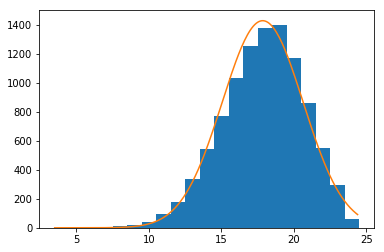

For  4  random numbers added  10000  times:
mean =  17.852 , variance =  7.7988959999999565 , sigma =  2.7926503540543623


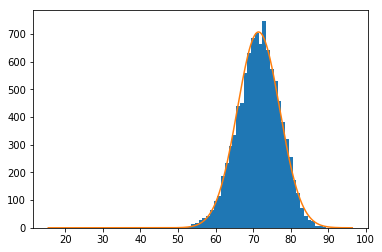

For  16  random numbers added  10000  times:
mean =  71.4529 , variance =  31.809381590000157 , sigma =  5.639980637378125


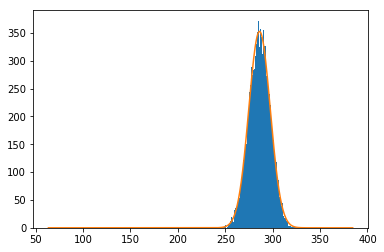

For  64  random numbers added  10000  times:
mean =  286.1415 , variance =  127.91007774999889 , sigma =  11.30973376123412


In [14]:
doAll(throwTriangle, 4, 10000, showGauss=1)
doAll(throwTriangle, 16, 10000, showGauss=1)
doAll(throwTriangle, 64, 10000, showGauss=1)

...and averaging triangles:

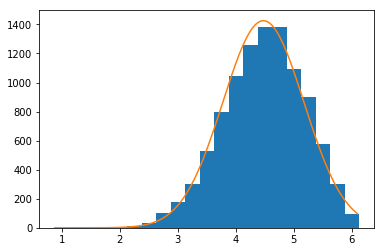

For  4  random numbers added  10000  times:
mean =  4.474925 , variance =  0.4896274943750001 , sigma =  0.6997338739656671


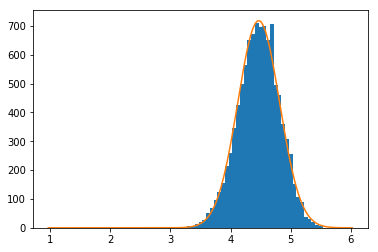

For  16  random numbers added  10000  times:
mean =  4.4681625 , variance =  0.12058793609374874 , sigma =  0.3472577372698105


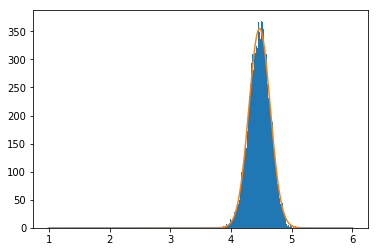

For  64  random numbers added  10000  times:
mean =  4.4718203125 , variance =  0.030822335876461437 , sigma =  0.17556291144903424


In [15]:
doAll(throwTriangle, 4, 10000, showGauss=1, average=1)
doAll(throwTriangle, 16, 10000, showGauss=1, average=1)
doAll(throwTriangle, 64, 10000, showGauss=1, average=1)

So it also works for a distribution as asymmetric and the triangle. Of course it also works for continuous distributions. Let's try an exponential.

In [16]:
def expo(Nevents):
    expoSample = np.random.exponential(scale = 1, size=Nevents)
    return expoSample

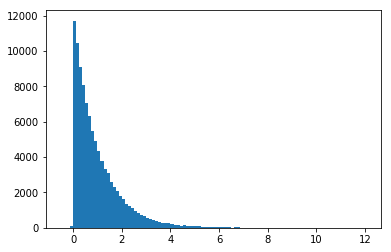

For  1  random numbers added  100000  times:
mean =  1.0003942087524635 , variance =  1.0055935222974277 , sigma =  1.002792861112118


In [17]:
doAll(expo, 1, 100000, 100, showGauss=0)

Summing exponentials:

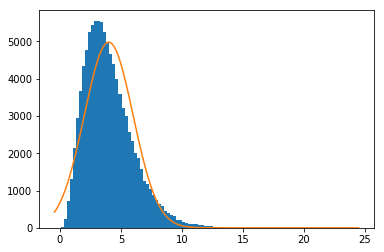

For  4  random numbers added  100000  times:
mean =  3.9996957932706643 , variance =  3.996392237478803 , sigma =  1.999097855903708


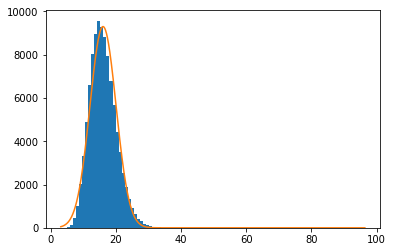

For  16  random numbers added  100000  times:
mean =  16.008843982971822 , variance =  16.065524178042722 , sigma =  4.008182153800239


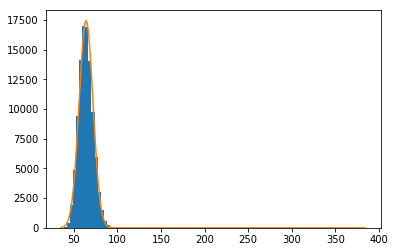

For  64  random numbers added  100000  times:
mean =  63.99481168244689 , variance =  63.77151970170007 , sigma =  7.985707213622352


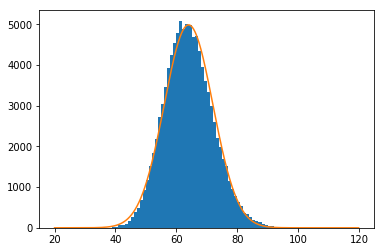

For  64  random numbers added  100000  times:
mean =  64.033393553503 , variance =  64.09439169285906 , sigma =  8.005897307164204


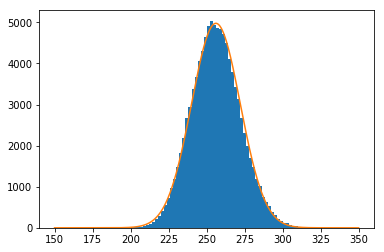

For  256  random numbers added  100000  times:
mean =  256.02198777827635 , variance =  257.11068954793154 , sigma =  16.034671482382528


In [18]:
doAll(expo, 4, 100000, 100, showGauss=1)
doAll(expo, 16, 100000, 100, showGauss=1)
doAll(expo, 64, 100000, 100, showGauss=1)
doAll(expo, 64, 100000, 100, 20, 120, showGauss=1) # zoom in a bit
doAll(expo, 256, 100000, 100, 150, 350, showGauss=1) # this will take a while

... and averaging them:

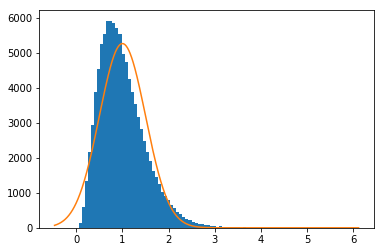

For  4  random numbers added  100000  times:
mean =  0.9997011167294686 , variance =  0.25067476544273737 , sigma =  0.5006743107477528


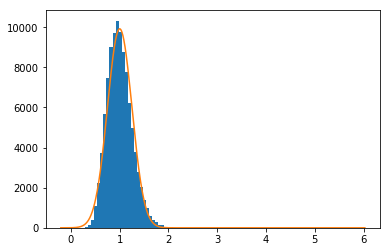

For  16  random numbers added  100000  times:
mean =  0.9999736004176796 , variance =  0.0628919995797631 , sigma =  0.250782773690226


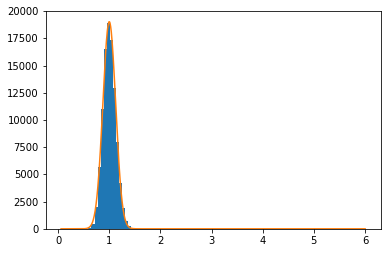

For  64  random numbers added  100000  times:
mean =  0.9994788466895432 , variance =  0.015560360273579432 , sigma =  0.12474117312892095


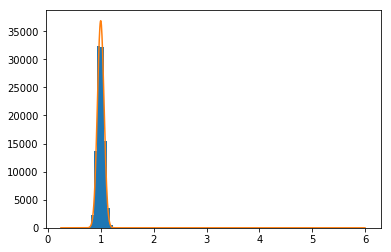

For  256  random numbers added  100000  times:
mean =  0.9996327938430257 , variance =  0.003873271350928853 , sigma =  0.06223561159761229


In [19]:
doAll(expo, 4, 100000, 100, showGauss=1, average=1)
doAll(expo, 16, 100000, 100, showGauss=1, average=1)
doAll(expo, 64, 100000, 100, showGauss=1, average=1)
doAll(expo, 256, 100000, 100, showGauss=1, average=1) # this will take a while

# Now repeat with your own probability distribution - can you find one that does not become Gaussian?